In [4]:
PRFX_ESMB = 'MelInfEsmb0809C1'

In [5]:
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as roc_auc
import matplotlib.pyplot as plt

class Param: pass

p_esmb = f'../output/{PRFX_ESMB}'; Path(p_esmb).mkdir(exist_ok=True,parents=True)
p_cmp = '../input/siim-isic-melanoma-classification'

In [12]:
prfx2wgt = {
    'MelInf0726B2tta16': 0.15,
    'MelInf0805A1tta16': 0.15,
    'MelInf0728A1tta16': 0.25,
    'MelInf0728B1tta16': 0.15,
    'MelInf0805C1tta16': 0.15,
    'MelInf0727A1tta16': 0.25,
    'MelInf0805D1tta16': 0.25,
    'MelInf0727B1tta16': 0.3,
    'MelInf0805E1tta16': 0.3,
    'MelInf0726G2tta16': 0.15,
    'MelInf0726G4tta16': 0.15,
    'MelInf0726H2tta16': 1.0,
    'MelInf0729H1tta16': 0.7,
    'MelInf0729E1tta16': 0.7,
    'MelInf0729D1tta16': 0.3,
    'MelInf0806C1tta16': 0.7,
    'MelInf0729F1tta16': 0.4,
    'MelInf0806D1tta16': 0.6,
    'MelInf0729C1tta16': 0.25,
    'MelInf0729C1tta16epc456': 0.35,
    'Mel0806E1tta16epc345': 0.35,
    'MelInf0808A1tta16': 0.25,
    'MelInf0729G3tta16epc567': 1.0,
    'MelInf0801A1tta16': 1.0,
}

In [13]:
prfx2oofs = {}
for prfx in prfx2wgt.keys():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    vls=[]
    oofs=[]
    for fld in range(4):
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{prfx}_fld_{fld}.p', 'rb'))
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof.mean(1)
        oofs += list(oof)

    ys = dftrn.target.iloc[vls]
    sortedzip = sorted(zip(vls, oofs, ys))
    _, oofs, ys = list(zip(*sortedzip))
    assert np.all(dftrn.target==ys)

    oofs = np.array(oofs)
    prfx2oofs[prfx] = oofs
    
    scr = roc_auc(ys, oofs)
    print(param.ARCH, param.SZ, f'{scr:.4f}', end=' ')
    
    idx20 = np.where(dftrn.source==20)[0]
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs[idx20])
    print(f'{scr20:.4f}', prfx2wgt[prfx], prfx)

efficientnet-b0 224 0.9279 0.8960 0.15 MelInf0726B2tta16
efficientnet-b0 224 0.9236 0.8962 0.15 MelInf0805A1tta16
efficientnet-b1 224 0.9301 0.9082 0.25 MelInf0728A1tta16
efficientnet-b2 224 0.9298 0.9062 0.15 MelInf0728B1tta16
efficientnet-b2 224 0.9287 0.9053 0.15 MelInf0805C1tta16
efficientnet-b3 224 0.9294 0.9063 0.25 MelInf0727A1tta16
efficientnet-b3 224 0.9292 0.9064 0.25 MelInf0805D1tta16
efficientnet-b4 224 0.9318 0.9094 0.3 MelInf0727B1tta16
efficientnet-b4 224 0.9312 0.9103 0.3 MelInf0805E1tta16
efficientnet-b5 224 0.9288 0.9113 0.15 MelInf0726G2tta16
efficientnet-b5 224 0.9277 0.8979 0.15 MelInf0726G4tta16
efficientnet-b6 224 0.9317 0.9139 1.0 MelInf0726H2tta16
efficientnet-b0 384 0.9336 0.9063 0.7 MelInf0729H1tta16
efficientnet-b1 384 0.9340 0.9196 0.7 MelInf0729E1tta16
efficientnet-b2 384 0.9347 0.9205 0.3 MelInf0729D1tta16
efficientnet-b2 384 0.9375 0.9302 0.7 MelInf0806C1tta16
efficientnet-b3 384 0.9330 0.9169 0.4 MelInf0729F1tta16
efficientnet-b3 384 0.9353 0.9219 0.6 M

In [14]:
oofs_esmb= np.zeros(len(dftrn))
for prfx,wgt in prfx2wgt.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    p_prp = f'../output/{param.PRFX_PREP}'
    dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

    oofs_esmb += wgt*prfx2oofs[prfx]
    scr = roc_auc(ys, oofs_esmb)
    scr20 = roc_auc(dftrn.target.iloc[idx20], oofs_esmb[idx20])
print(PRFX_ESMB, f'{scr:.4f}', f'{scr20:.4f}')

MelInfEsmb0809C1 0.9421 0.9270


MelInf0726B2tta16 0.17577293900882407


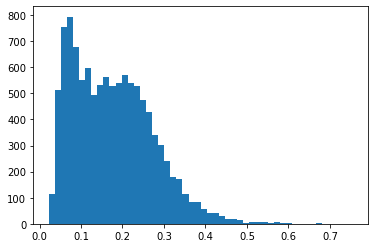

MelInf0805A1tta16 0.1852360767356046


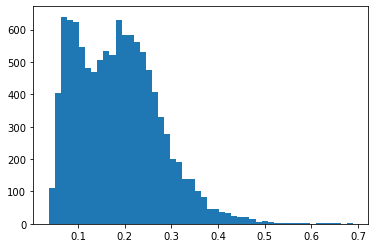

MelInf0728A1tta16 0.1697970152984186


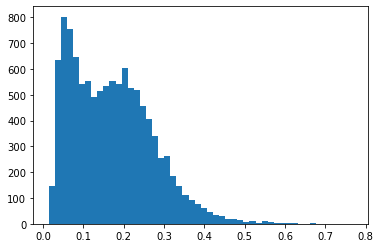

MelInf0728B1tta16 0.15783098760570596


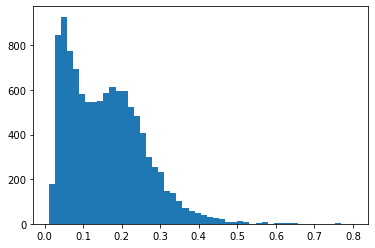

MelInf0805C1tta16 0.18550869943493037


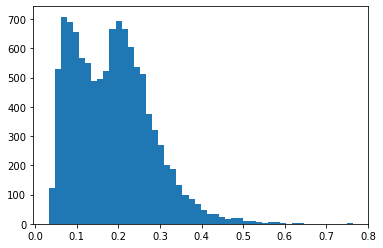

MelInf0727A1tta16 0.15930823437581493


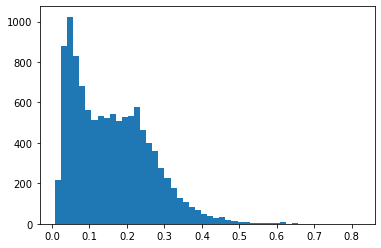

MelInf0805D1tta16 0.17837462669376472


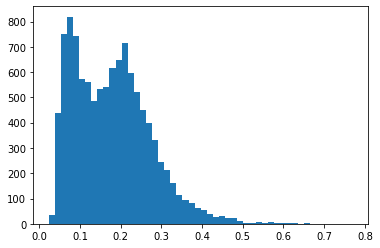

MelInf0727B1tta16 0.15253438272176548


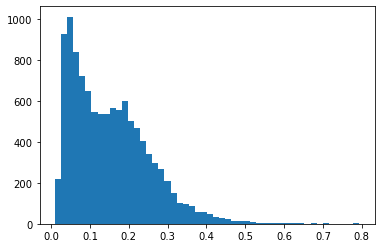

MelInf0805E1tta16 0.17570575343026482


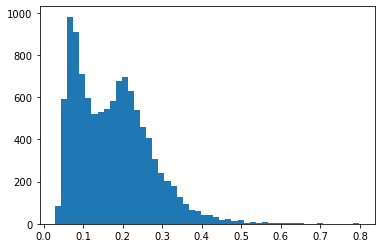

MelInf0726G2tta16 0.15595904496625135


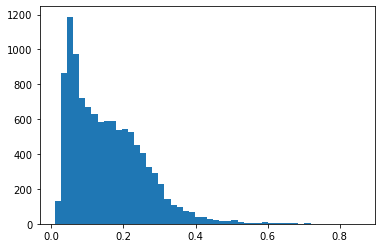

MelInf0726G4tta16 0.195412380182344


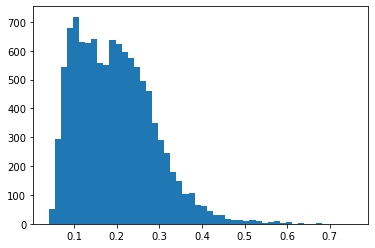

MelInf0726H2tta16 0.15230585584603645


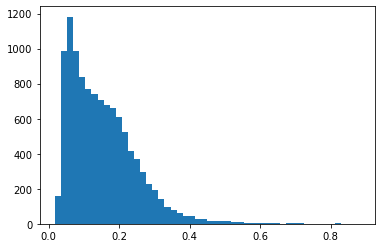

MelInf0729H1tta16 0.15282431964950818


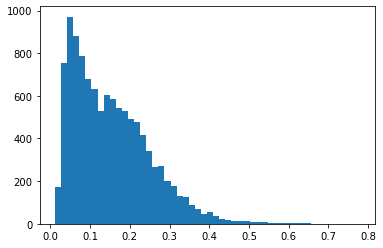

MelInf0729E1tta16 0.14824956054377292


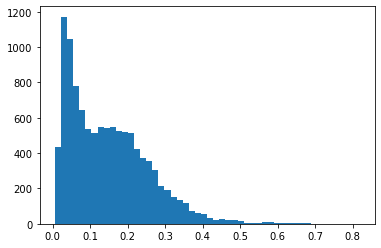

MelInf0729D1tta16 0.1499509768921909


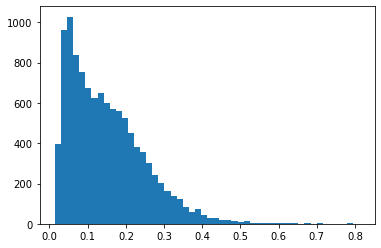

MelInf0806C1tta16 0.1632805076088609


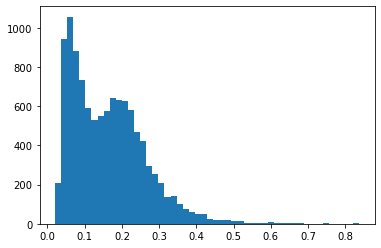

MelInf0729F1tta16 0.1487084176636413


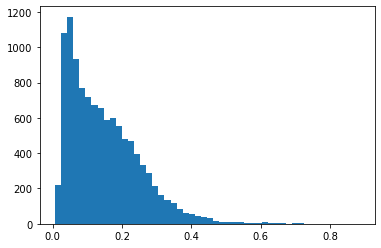

MelInf0806D1tta16 0.17213049339909336


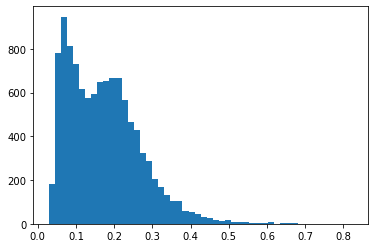

MelInf0729C1tta16 0.1371323752740608


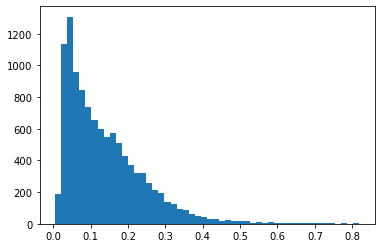

MelInf0729C1tta16epc456 0.1582704462621681


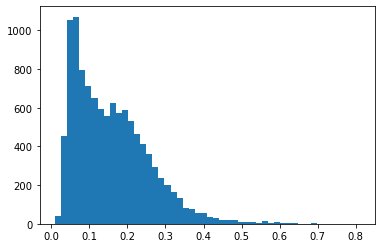

Mel0806E1tta16epc345 0.1657605117769836


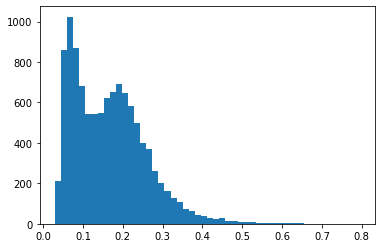

MelInf0808A1tta16 0.1786412484494178


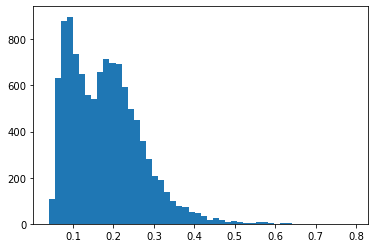

MelInf0729G3tta16epc567 0.18763088324121233


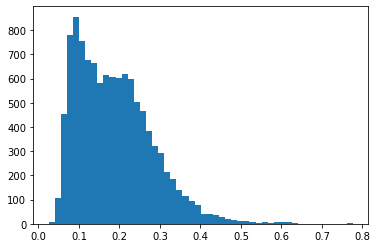

MelInf0801A1tta16 0.16702342384519106


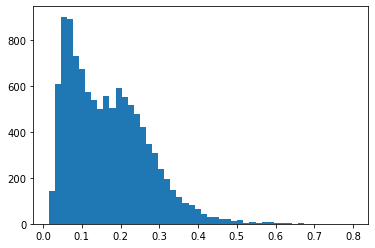

In [15]:
dfsub = pd.read_csv(f'{p_cmp}/sample_submission.csv') 


wgt_ttl=0
sub_esmb=np.zeros(len(dfsub))
for prfx,wgt in prfx2wgt.items():
    p_out = f'../output/{prfx}'
    res = pickle.load(open(f'{p_out}/results_{prfx}.p', 'rb'))
    param = res['param']
    dfsubi = pd.read_csv(f'{p_out}/submission_{prfx}_avglast{param.LASTM}.csv')
    wgt_ttl+=wgt
    subi = dfsubi.target
    print(prfx, subi.mean())
    plt.hist(subi, bins=50);
    plt.show()
    sub_esmb += wgt*subi
sub_esmb/=wgt_ttl

0.16404156963845076


,image_name,target
0,ISIC_0052060,0.066151
1,ISIC_0052349,0.056751
2,ISIC_0058510,0.071300


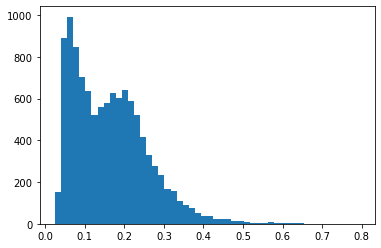

In [16]:
print(sub_esmb.mean())
dfsub.target = sub_esmb

display(dfsub.head(3))
plt.hist(dfsub.target, bins=50);

In [17]:
dfsub.to_csv(f'{p_esmb}/submission_{PRFX_ESMB}.csv', index=False)